<a href="https://colab.research.google.com/github/PALADUGU-DAKSHAYANI/dakshayani/blob/main/cleaningdatawithforbiddenItemsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required python classes and packages
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as npl21+2yy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#load and display dataset values
dataset = pd.read_csv("Adult.csv")
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#selecting relevant columns to perform frequent patterns
dataset = pd.read_csv("Adult.csv", nrows=25000, usecols=['age', 'marital-status', 'relationship', 'gender', 'income'])
dataset = dataset.astype(str)
dataset = dataset.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
print("FREQUEENT ITEM SETS")
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FREQUEENT ITEM SETS
      support                                       itemsets
0     0.01164                                           (17)
1     0.01812                                           (18)
2     0.02160                                           (19)
3     0.02348                                           (20)
4     0.02256                                           (21)
...       ...                                            ...
1165  0.00532  (>50K, Male, 48, Married-civ-spouse, Husband)
1166  0.00524  (>50K, Male, 49, Married-civ-spouse, Husband)
1167  0.00568  (>50K, Male, Married-civ-spouse, Husband, 50)
1168  0.00524  (>50K, Male, 51, Married-civ-spouse, Husband)
1169  0.00504  (>50K, Male, 53, Married-civ-spouse, Husband)

[1170 rows x 2 columns]


In [ ]:
#calculating lift score to find all forbidden item sets
lift_scores = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0001)
print(lift_scores)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               antecedents                                consequents  \
0                     (17)                                    (<=50K)   
1                  (<=50K)                                       (17)   
2                     (17)                                   (Female)   
3                 (Female)                                       (17)   
4                   (Male)                                       (17)   
...                    ...                                        ...   
8523                (>50K)    (Husband, Male, Married-civ-spouse, 53)   
8524                (Male)    (Husband, >50K, Married-civ-spouse, 53)   
8525                  (53)  (Husband, >50K, Male, Married-civ-spouse)   
8526  (Married-civ-spouse)                  (Husband, >50K, Male, 53)   
8527             (Husband)       (>50K, Male, Married-civ-spouse, 53)   

      antecedent support  consequent support  support  confidence      lift  \
0                0.01164             0.76312

In [ ]:
lift = lift_scores['lift'].values.ravel()
forbidden = []
dup = []
for i in range(len(lift)):
    if lift[i] > 0.32 and lift[i] <= 0.35:#weak association
        first = list(lift_scores.iloc[i,0])[0]
        second = list(lift_scores.iloc[i,1])[0]
        if first+second not in dup and second+first not in dup:
            dup.append(first+second)
            forbidden.append([first+" "+second, str(lift_scores.iloc[i,6])])
forbidden = pd.DataFrame(forbidden, columns=['Forbidden Itemsets', 'Lift Score'])
forbidden

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Forbidden Itemsets,Lift Score
0,Married-civ-spouse Female,0.3394502803414482
1,Male Widowed,0.3285132071971446
2,<=50K Male,0.3410392446655462
3,>50K Female,0.339601449912954
4,Not-in-family >50K,0.33695041316196805


In [ ]:
#function to calculate Similarity
def similarity(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#function to repair forbidden itemsets with normal values
cluster = []
dup = []
distance_values = []
for i in range(len(lift)):
    if lift[i] > 2:
        first = list(lift_scores.iloc[i,0])[0]
        second = list(lift_scores.iloc[i,1])[0]
        if first+second not in dup and second+first not in dup:
            dup.append(first+second)
            cluster.append(first+" "+second)
dirty = forbidden['Forbidden Itemsets'].values.ravel()
for i in range(len(dirty)):
    replace = ""
    sim_score = 1000
    for j in range(len(cluster)):
        distance = similarity(dirty[i], cluster[j])
        if distance < sim_score:
            sim_score = distance
            replace = cluster[j]
    distance_values.append(sim_score)
    print(dirty[i]+" (Must Repair with) "+replace)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Married-civ-spouse Female (Must Repair with) Married-civ-spouse >50K
Male Widowed (Must Repair with) Male Divorced
<=50K Male (Must Repair with) <=50K Female
>50K Female (Must Repair with) >50K Female
Not-in-family >50K (Must Repair with) Not-in-family 25


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


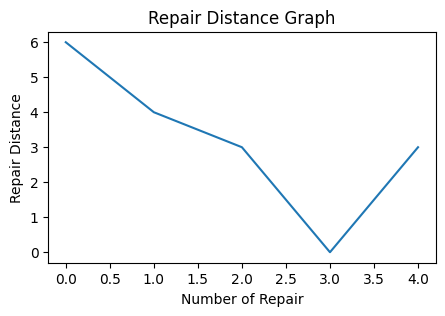

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(distance_values)
plt.xlabel("Number of Repair")
plt.ylabel("Repair Distance")
plt.title("Repair Distance Graph")
plt.show()